In [1]:
import numpy as np
import pandas as pd
from scipy.stats import *

In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

도수분포표 : 분할된 구간과 데이터의 개수를 표로 정리한 것


In [2]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
# 50명의 영어 점수 array
eng = df['english']

eng.describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
Name: english, dtype: float64

In [5]:
np.histogram(eng, bins=10, range=(0,100))

(array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [4]:
# bins 구간의 개수
freq, _ = np.histogram(eng, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [16]:
# 0~10, 10~20, ...이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]

# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [9]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용
# 예. 60~70의 계급의 계급값은 65

In [11]:
# 계급값 구하기
class_value = [(i+(i+10))/2 for i in range(0,100,10)]
class_value

[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0]

In [12]:
# 상대도수 : 전체 데이터에 대해서 해당 계급의 데이터가 
# 어느 정도 비율을 차지하고 있는지를 나타냄

rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [13]:
# 누적 상대도수: 해당 계급까지의 상대도수의 합
# 누적합 : np.cumsum()
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [17]:
# 도수 분포표 확장
freq_dist_df['class value'] = class_value
freq_dist_df['relative freq.'] = rel_freq
freq_dist_df['cum. relative freq.'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative freq.,cum. relative freq.
class,,,,
0~10,0,5.0,0.00,0.00
10~20,0,15.0,0.00,0.00
20~30,0,25.0,0.00,0.00
30~40,2,35.0,0.04,0.04
40~50,8,45.0,0.16,0.20
50~60,16,55.0,0.32,0.52
60~70,18,65.0,0.36,0.88
70~80,6,75.0,0.12,1.00
80~90,0,85.0,0.00,1.00


도수분포표의 최빈값 : 최대가 되는 계급의 계급값 (=> 예의 데이터에서는 60~70인 계급의 도수가 최대가 됨)

pandas.DataFrmae의 idxmax(), idxmin()함수

In [19]:
import pandas as pd
dataframe = pd.DataFrame({'Attendance':{0:60,1:100,2:80,3:78,4:95},
                        'Obtained Marks':{0:90,1:75,2:82,3:64,4:45}})
dataframe

,Attendance,Obtained Marks
0,60,90
1,100,75
2,80,82
3,78,64
4,95,45


In [25]:
# idmax(axis=0)이 기본값, 열 내부 값끼리 비교
# idmax(axis=1) 행끼리 값비교
series1 = dataframe.idxmax()
series2 = dataframe.idxmax(axis=1)

series1
series2

Attendance        1
Obtained Marks    0
dtype: int64

0    Obtained Marks
1        Attendance
2    Obtained Marks
3        Attendance
4        Attendance
dtype: object

In [26]:
series = dataframe.idxmin()
series

Attendance        0
Obtained Marks    4
dtype: int64

In [27]:
# 도수 분포표 최빈 값
# 가장 빈도가 높은 계급의 계급값 반환
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65.0

In [28]:
# 백분위수 및 사분위수 계산
x = np.arange(1,12,1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [29]:
np.percentile(x, 10) # np.percentile(데이터, 백분위수)
np.quantile(x, 0.1) # np.quantile(데이터, 0~1사이의 값으로 입력)

2.0

2.0

In [30]:
np.percentile(x, 25) # 25%의 값
np.quantile(x, 0.25) # 하사분위수

3.5

3.5

In [31]:
import matplotlib.pyplot as plt

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  3.,  3.,
         7.,  8.,  6., 10.,  5.,  2.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100.]),
 <BarContainer object of 25 artists>)

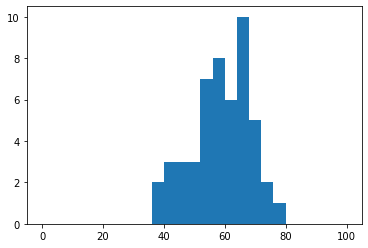

In [32]:
# 히스토그램
plt.hist(eng, bins=25, range=(0, 100))
plt.show()

(array([ 0.,  0.,  0.,  0.,  0.,  2.,  4.,  6., 14., 15.,  7.,  2.,  0.,
         0.,  0.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ]),
 <BarContainer object of 15 artists>)

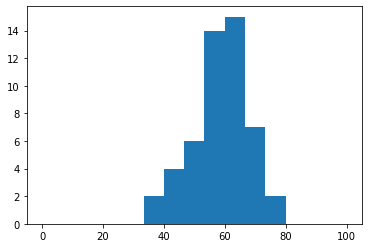

In [33]:
plt.hist(eng, bins=15, range=(0, 100))
plt.show()

(array([ 0.,  0.,  0.,  2.,  8., 16., 18.,  6.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

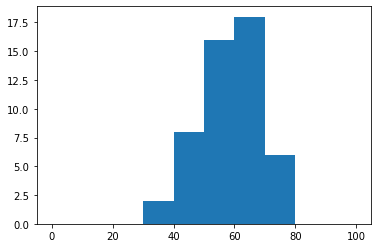

In [34]:
plt.hist(eng, bins=10, range=(0, 100))
plt.show()

In [35]:
# 막대의 너비가 넓을수록 , bins의 개수가 작을수록 뭉뜨그려 그려짐

{'whiskers': [<matplotlib.lines.Line2D at 0x1595dfd94f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1595dfd9a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1595dfd9100>],
 'medians': [<matplotlib.lines.Line2D at 0x1595dfe6220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1595dfe65b0>],
 'means': []}

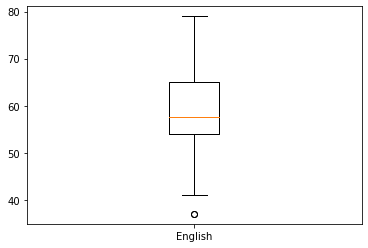

In [37]:
# 상자그림
plt.boxplot(eng, labels=['English'])
plt.show()

In [ ]:
# 상자그림 봤을 때
# 박스 안의 선(중앙값)이 아래 쪽에 있다면, 
# 데이터는 좁은 쪽에 많이 몰려있다.
# (여기서는 아래 쪽에 데이터가 많이 몰려있다.)

# 분포모양으로 왜도를 봐 비대칭인지 대칭인지 볼 수 있음
# 이상치를 알 수 있음